In [ ]:
import os
import tensorflow as tf
import keras

2024-12-12 15:10:38.257134: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 15:10:38.257588: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-12 15:10:38.260161: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-12 15:10:38.266137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734005438.275596   80909 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734005438.27

In [3]:
data_dir = "dataset/chest_xray"

train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

In [ ]:
#Data Augmentation and Normalization
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0, 
                                   rotation_range = 20, 
                                   zoom_range = 0.1, 
                                   horizontal_flip = True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)

In [5]:
#Downloading Datasets
train_data = train_datagen.flow_from_directory(
    train_dir, target_size = (150, 150), batch_size = 32, class_mode = 'binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir, target_size = (150, 150), batch_size = 32, class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
#ResNet50 model
base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

#Freeze the weights of base model
base_model.trainable = False

#Add Top Layers
model = keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # For binary classification (sigmoid)
])

#Compiling Model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

#Model Summary
model.summary()


2024-12-12 15:58:22.686399: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 15:58:22.686890: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-12 15:58:22.690278: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-12 15:58:22.696442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734008302.706173  101766 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734008302.70

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,141,569 (114.98 MB)

 Trainable params: 6,553,857 (25.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
#Training Model
history = model.fit(train_data, epochs = 10, validation_data = test_data)

/home/livan/anaconda3/envs/TF/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.7074 - loss: 0.6004

/home/livan/anaconda3/envs/TF/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 440ms/step - accuracy: 0.7076 - loss: 0.6001 - val_accuracy: 0.7564 - val_loss: 0.5553
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 428ms/step - accuracy: 0.7494 - loss: 0.5089 - val_accuracy: 0.7580 - val_loss: 0.4932
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 428ms/step - accuracy: 0.7646 - loss: 0.4655 - val_accuracy: 0.7772 - val_loss: 0.4938
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 429ms/step - accuracy: 0.7661 - loss: 0.4728 - val_accuracy: 0.7821 - val_loss: 0.4784
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 432ms/step - accuracy: 0.7880 - loss: 0.4388 - val_accuracy: 0.7901 - val_loss: 0.4585
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 432ms/step - accuracy: 0.7820 - loss: 0.4472 - val_accuracy: 0.7324 - val_loss: 0.4947
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 432ms/step - accuracy: 0.7856 - loss: 0.4321 - val_accuracy: 0.8013 - val_loss: 0.4496
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 430ms/step - accuracy: 0.8043 - loss: 0.4165 - val

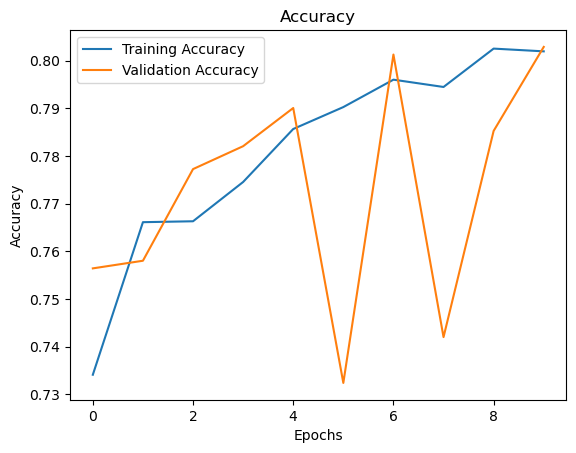

In [8]:
import matplotlib.pyplot as plt

#Accuracy of Training and Validation
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

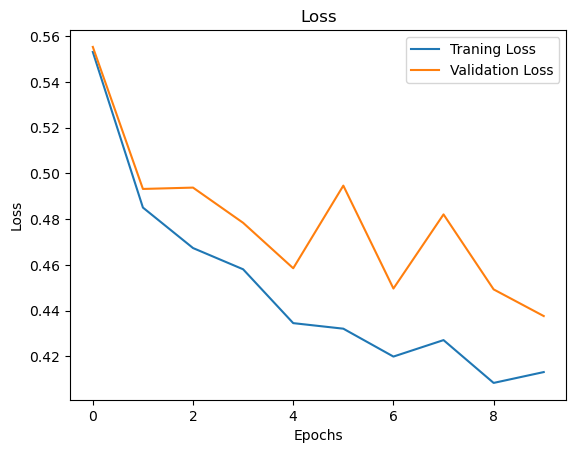

In [9]:
# Training and Validation Loss
plt.plot(history.history['loss'], label = 'Traning Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [10]:
model.save("trained_model.h5")